In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *

In [2]:
# read in EAZY outputs
# only need 3rd, 6th, and 7th columns

# use for Mr and (Mg-Mr) color

data = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/LRG_OUTPUT/LRG_main_output.295-297.rf', 'r')
# data = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_master_v4.1.80-81.rf', 'r')
lines = data.readlines()[11:]

# print(lines)

z = []
DM = []
L_rfilter = []
L_zfilter = []

for line in lines:
    p = line.split()
    z.append(float(p[1]))
    DM.append(float(p[2]))
    L_rfilter.append(float(p[5]))
    L_zfilter.append(float(p[6]))
    
print(len(DM))
print(DM[0])
print(len(L_rfilter))
print(len(L_zfilter))
# print(type(z[0]))
# zarr = np.array(z)

DM_arr = np.array(DM)
L_rfilter_arr = np.array(L_rfilter)
L_zfilter_arr = np.array(L_zfilter)


1823
39.88
1823
1823


In [ ]:
# from astropy.io import ascii
# data_cat = ascii.read("/Users/mtownsend/eazy-photoz/inputs/UVISTA_master_v4.1.cat")  
# print(data_cat)                      

In [ ]:
# print(len(data_cat['gp']))
# gp = data_cat['gp']
# rp = data_cat['rp']
# zp = data_cat['zp']


# print(type(np.asarray(zp)))
# print(np.asarray(zp))

# print(type(gp[0]))
# print(rp[0])
# print(zp[0])

# print(len(gp[np.where((gp > 0) & (rp > 0) & (zp > 0))]))
# print(len(gp[np.where(gp > 0)]))
# print(len(rp[np.where((gp > 0) & (rp > 0) & (zp > 0))]))
# print(len(rp[np.where(rp > 0)]))
# print(len(zp[np.where((gp > 0) & (rp > 0) & (zp > 0))]))
# print(len(zp[np.where(zp > 0)]))

# zmag = 22.5 - 2.5 * np.log10(zp)

# cut = np.where((np.asarray(gp) > 0.) & (np.asarray(rp) > 0.) & (np.asarray(zp) > 0.))
# cut0 = cut[0]
# print(type(cut0))

# gmag = 22.5 - 2.5 * np.log10(gp[cut0])
# rmag = 22.5 - 2.5 * np.log10(rp[cut0])
# zmag = 22.5 - 2.5 * np.log10(zp[cut0])

# zphot = zarr[cut0]
# DMarr = np.array(DM)
# DM_cut = DMarr[cut0]

# print(len(gmag))
# print(len(rmag))
# print(len(zmag))
# print(len(zphot))
# print(len(DM_cut))

In [3]:
# Reads in data files for use in readData.py

hdu_north = fits.open('/Users/mtownsend/anaconda/Data/survey-dr8-north-specObj-dr14.fits') # this matches SDSS LRGs to MzLS/BASS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS and LEGACY SURVEYS
hdu_south = fits.open('//Users/mtownsend/anaconda/Data/survey-dr8-south-specObj-dr14.fits')# this matches SDSS LRGs to DECaLS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS and LEGACY SURVEYS
hdu_sdss = fits.open('/Users/mtownsend/anaconda/Data/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
hdu_sweep1 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p005-250p010-dr8.fits') # this is one sweep file of the DECaLS data
hdu_sweep2 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p010-250p015-dr8.fits') # this is one sweep file of the DECaLS data


# hdulist = fits.open('/Users/mtownsend/anaconda/Data/survey-dr7-specObj-dr14.fits') # this matches SDSS LRGs to DECaLS;
#                                                                  # ONLY GIVES SOURCES THAT ARE IN SDSS AND DECALS
# hdulist2 = fits.open('/Users/mtownsend/anaconda/Data/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
# hdulist3 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p005-250p010-dr7.fits') # this is one sweep file of the DECaLS data
# hdulist4 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p010-250p015-dr7.fits') # this is one sweep file of the DECaLS data

# hdulist = fits.open('/Users/mindy/Research/Data/lrgProjectData/survey-dr7-specObj-dr14.fits') # this matches SDSS LRGs to DECaLS;
#                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS AND DECALS
# hdulist2 = fits.open('/Users/mindy/Research/Data/lrgProjectData/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
# hdulist3 = fits.open('/Users/mindy/Research/Data/lrgProjectData/sweep-240p005-250p010-dr7.fits') # this is one sweep file of the DECaLS data
# hdulist4 = fits.open('/Users/mindy/Research/Data/lrgProjectData/sweep-240p010-250p015-dr7.fits') # this is one sweep file of the DECaLS data


SpecObj_data_north = hdu_north[1].data
SpecObj_data_south = hdu_south[1].data
SDSS_data = hdu_sdss[1].data
DECaLS_data1 = hdu_sweep1[1].data
DECaLS_data2 = hdu_sweep2[1].data

# SpecObj_data = hdulist[1].data
# SDSS_data = hdulist2[1].data
# DECaLS_data1 = hdulist3[1].data
# DECaLS_data2 = hdulist4[1].data

# id_LRG1, specobjid_LRG1, ra_LRG1, dec_LRG1, ra_BKG1, dec_BKG1, z_LRG1, gflux_LRG1, rflux_LRG1, zflux_LRG1, gflux_BKG1, rflux_BKG1, zflux_BKG1 = readData(SpecObj_data_south, SDSS_data, DECaLS_data1)

# id_LRG2, specobjid_LRG2, ra_LRG2, dec_LRG2, ra_BKG2, dec_BKG2, z_LRG2, gflux_LRG2, rflux_LRG2, zflux_LRG2, gflux_BKG2, rflux_BKG2, zflux_BKG2 = readData(SpecObj_data_south, SDSS_data, DECaLS_data2)

id_LRG1, plate_LRG1, fiberid_LRG1, specobjid_LRG1, ra_LRG1, dec_LRG1, ra_BKG1, dec_BKG1, z_LRG1, gflux_LRG1, rflux_LRG1, zflux_LRG1, w1flux_LRG1, w2flux_LRG1, w3flux_LRG1, w4flux_LRG1, gflux_BKG1, rflux_BKG1, zflux_BKG1, w1flux_BKG1, w2flux_BKG1, w3flux_BKG1, w4flux_BKG1, gflux_ivar_LRG1, rflux_ivar_LRG1, zflux_ivar_LRG1, w1flux_ivar_LRG1, w2flux_ivar_LRG1, w3flux_ivar_LRG1, w4flux_ivar_LRG1, gflux_ivar_BKG1, rflux_ivar_BKG1, zflux_ivar_BKG1, w1flux_ivar_BKG1, w2flux_ivar_BKG1, w3flux_ivar_BKG1, w4flux_ivar_BKG1, mw_transmission_g_LRG1, mw_transmission_r_LRG1, mw_transmission_z_LRG1, mw_transmission_g_BKG1, mw_transmission_r_BKG1, mw_transmission_z_BKG1, mw_transmission_w1_LRG1, mw_transmission_w2_LRG1, mw_transmission_w3_LRG1, mw_transmission_w4_LRG1, mw_transmission_w1_BKG1, mw_transmission_w2_BKG1, mw_transmission_w3_BKG1, mw_transmission_w4_BKG1 = readData(SpecObj_data_south, SDSS_data, DECaLS_data1)
id_LRG2, plate_LRG2, fiberid_LRG2, specobjid_LRG2, ra_LRG2, dec_LRG2, ra_BKG2, dec_BKG2, z_LRG2, gflux_LRG2, rflux_LRG2, zflux_LRG2, w1flux_LRG2, w2flux_LRG2, w3flux_LRG2, w4flux_LRG2, gflux_BKG2, rflux_BKG2, zflux_BKG2, w1flux_BKG2, w2flux_BKG2, w3flux_BKG2, w4flux_BKG2, gflux_ivar_LRG2, rflux_ivar_LRG2, zflux_ivar_LRG2, w1flux_ivar_LRG2, w2flux_ivar_LRG2, w3flux_ivar_LRG2, w4flux_ivar_LRG2, gflux_ivar_BKG2, rflux_ivar_BKG2, zflux_ivar_BKG2, w1flux_ivar_BKG2, w2flux_ivar_BKG2, w3flux_ivar_BKG2, w4flux_ivar_BKG2, mw_transmission_g_LRG2, mw_transmission_r_LRG2, mw_transmission_z_LRG2, mw_transmission_g_BKG2, mw_transmission_r_BKG2, mw_transmission_z_BKG2, mw_transmission_w1_LRG2, mw_transmission_w2_LRG2, mw_transmission_w3_LRG2, mw_transmission_w4_LRG2, mw_transmission_w1_BKG2, mw_transmission_w2_BKG2, mw_transmission_w3_BKG2, mw_transmission_w4_BKG2 = readData(SpecObj_data_south, SDSS_data, DECaLS_data2)


print("end readdata")

# IMPORTANT NOTE: LRG data is the same for each.

done reading in SDSS
done reading in DECaLS-SDSS matched file
done creating unique IDs for matched file
done making LRG only cut
done reading in DECaLS bricks
length of id_ALL:  4488579
done creating unique IDs for brick file
done identifying LRGs in survey brick
631147
done making survey cuts
done reading in SDSS
done reading in DECaLS-SDSS matched file
done creating unique IDs for matched file
done making LRG only cut
done reading in DECaLS bricks
length of id_ALL:  4076998
done creating unique IDs for brick file
done identifying LRGs in survey brick
249137
done making survey cuts
end readdata


In [4]:
# calculate LRG magnitudes

gmag_LRG = 22.5 - 2.5 * np.log10(gflux_LRG1/mw_transmission_g_LRG1)
rmag_LRG = 22.5 - 2.5 * np.log10(rflux_LRG1/mw_transmission_r_LRG1)
zmag_LRG = 22.5 - 2.5 * np.log10(zflux_LRG1/mw_transmission_z_LRG1)
print(len(zmag_LRG))

LRG_cuts = ((z_LRG1 >= 0.2) & (z_LRG1 <= 0.65) & (zmag_LRG <= 22.36))

gmag_cut = gmag_LRG[np.where((z_LRG1 >= 0.2) & (z_LRG1 <= 0.65) & (zmag_LRG <= 22.36))]
rmag_cut = rmag_LRG[np.where((z_LRG1 >= 0.2) & (z_LRG1 <= 0.65) & (zmag_LRG <= 22.36))]
zmag_cut = zmag_LRG[np.where((z_LRG1 >= 0.2) & (z_LRG1 <= 0.65) & (zmag_LRG <= 22.36))]
z_cut = z_LRG1[np.where((z_LRG1 >= 0.2) & (z_LRG1 <= 0.65) & (zmag_LRG <= 22.36))]
# DM_cut = DM_arr[np.where((z_LRG1 >= 0.2) & (z_LRG1 <= 0.65) & (zmag_LRG <= 22.36))]

print(len(gmag_cut))
print(len(rmag_cut))
print(len(zmag_cut))
print(len(z_cut))
# print(len(DM_cut))

print(gflux_LRG1[0])
print(mw_transmission_g_LRG1[0])
print(22.5 - 2.5 * np.log10(gflux_LRG1[0]))
print(gmag_LRG[0])

2037
1823
1823
1823
1823
34.55326
0.8694739
18.653777539730072
18.501919


In [5]:
# calculate rest-frame magnitudes

K_correct = -2.5*np.log10((1. + z_cut)**-1.)
print(len(K_correct))
# print(len(zphot[np.where(zmag <= 22.36)]))
# print(len(rmag_LRG[np.where(zmag_LRG <= 22.36)]))

Mr = rmag_cut - DM_arr - K_correct
print(len(Mr))
Mz = zmag_cut - DM_arr - K_correct
# print(len(Mg))


# calculate rest-frame colors

# Lg = np.array(L_gfilter)
# Lr = np.array(L_rfilter)

# grcolor_LRG = -2.5*np.log10(Lg/Lr)
# print(grcolor_LRG)

1823
1823


-22.354355057809812
-22.38792870759964


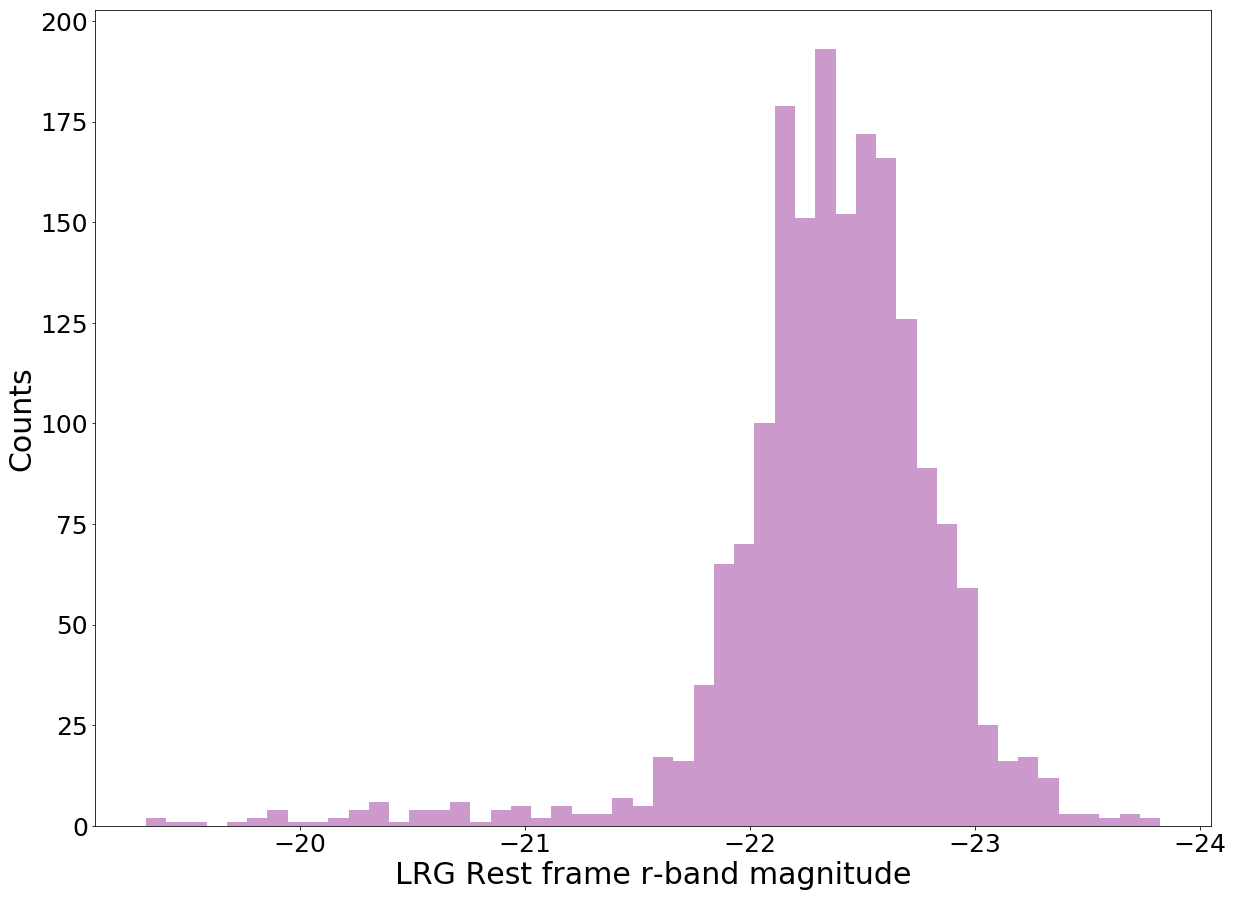

In [9]:
# Plot rest frame r magnitudes
import seaborn as sns

plt.rcParams["figure.figsize"] = [20, 15]
sns.distplot(Mr, bins=50, kde=False, color='purple')
# plt.title('LRG Mr Distribution, Mr > -20.5', fontsize=25)
plt.xlabel('LRG Rest frame r-band magnitude', fontsize=30)
plt.ylabel('Counts', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.gca().invert_xaxis()
# plt.savefig('/Users/mtownsend/Desktop/LRG_Mr_dist_faint_v1.jpg')
plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/LRG_Mr_dist-v1.pdf')

print(np.mean(Mr))
print(np.median(Mr))

In [27]:
# let me take a stab at calculating rest-frame luminosities

# absolute magnitudes of the sun in DECaM g, r, and z filters from Willmer ApJS, 2018
Msun_g = 5.05
Msun_r = 4.61
Msun_z = 4.50

# calculate L_g/Lsun_g
# L_g = 10.**((Mg-Msun_g)/(-2.5))
# print(Mg[0])
# print(Msun_g)
# print(L_g[0])
# print(np.log10(L_g[0]))

# calculate L_g/Lsun_g
# Lr = 10.**((Mr-Msun_r)/(-2.5))

# # calculate L_g/Lsun_g
Lz = 10.**((Mz-Msun_z)/(-2.5))

# print(len(L_g))
print(len(Lz))



1823


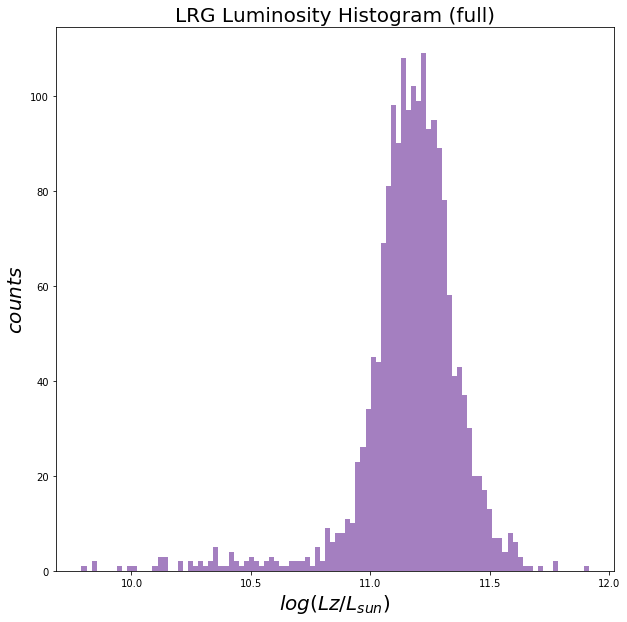

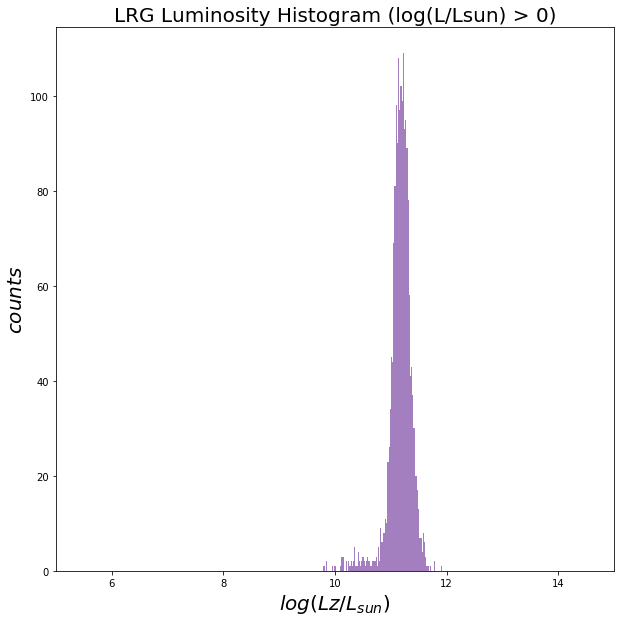

In [28]:
plt.subplots(figsize=(10,10))
plt.hist(np.log10(Lz), bins=100, alpha=0.5, color='indigo')
plt.title("LRG Luminosity Histogram (full)", fontsize=20)
plt.xlabel(r'$log(Lz/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
# plt.legend(fontsize=12)
# plt.gca().invert_xaxis()
# plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_LRGs_all-v1.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_LRGs_all-v1.pdf')
plt.show()

plt.subplots(figsize=(10,10))
plt.hist(np.log10(Lz), bins=100, alpha=0.5, color='indigo')
plt.title("LRG Luminosity Histogram (log(L/Lsun) > 0)", fontsize=20)
plt.xlabel(r'$log(Lz/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.xlim(5,15)
# plt.legend(fontsize=12)
# plt.gca().invert_xaxis()
# plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_LRGs_gt0-v1.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_LRGs_gt0-v1.pdf')
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(10,10))
points = ax.scatter(z_cut, np.log10(L_r), s=10, c='purple')
plt.title("Luminosity in r-band vs redshift with extinction correction (LRGs)", fontsize=15)
# plt.axvline(x=0.2)
# plt.axvline(x=0.65)
plt.xlabel(r'$redshift$', fontsize=15)
plt.ylabel(r'$log(L_r/L_{sun,r})$', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/lum_v_redshift_r_extinct_correct.jpeg')
plt.savefig('/Users/mtownsend/Desktop/lum_v_redshift_r_extinct_correct.pdf')
plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# plt.rcParams["figure.figsize"] = [10, 10]
# plt.scatter(Mr, grcolor_LRG, s = 3, marker = '*', color='red')
# plt.gca().invert_xaxis()
# plt.title("Color-Magnitude Diagram", fontsize=15)
# plt.xlabel(r'$r-mag$')
# plt.ylabel(r'$(g-r)$ $color$')
# plt.show()


import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# sns.scatterplot(x=Mr, y=grcolor_LRG)
# plt.gca().invert_xaxis()
# plt.title("Color-Magnitude Diagram", fontsize=15)
# plt.xlabel(r'$M_r$')
# plt.ylabel(r'$(M_g-M_r)$ $color$')
# plt.savefig('/Users/mtownsend/Desktop/rest_frame_CMD_g-r.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/rest_frame_CMD_g-r.pdf')
# plt.show()

cmap = sns.cubehelix_palette(as_cmap=True)

f, ax = plt.subplots(figsize=(15,15))
points = ax.scatter(Mr, grcolor_LRG, c=z_LRG1, s=10, cmap=cmap)
plt.gca().invert_xaxis()
plt.title("Color-Magnitude Diagram (LRGs)", fontsize=15)
plt.xlabel(r'$M_r$')
plt.ylabel(r'$(M_g-M_r)$')
f.colorbar(points)
plt.savefig('/Users/mtownsend/Desktop/rest_frame_CMD_LRG_g-r_v2.jpeg')
plt.savefig('/Users/mtownsend/Desktop/rest_frame_CMD_LRG_g-r_v2.pdf')
plt.show()


In [ ]:
# read in EAZY output for (r-z) color

data2 = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/LRG_main_output.295-297.rf', 'r')
lines2 = data2.readlines()[11:]

# print(lines)

# DM = []
L_zfilter = []
L_rfilter2 = []

for line in lines2:
    p = line.split()
#     print(type(p[0]))
#     DM.append(float(p[2]))
    L_rfilter2.append(float(p[5]))
    L_zfilter.append(float(p[6]))
    
print(len(L_zfilter))

In [ ]:
Mr2 = rmag_LRG - DM - K_correct
Mz = zmag_LRG - DM - K_correct


# calculate rest-frame colors

Lr2 = np.array(L_rfilter2)
Lz = np.array(L_zfilter)

rzcolor_LRG = -2.5*np.log10(Lr2/Lz)
print(rzcolor_LRG)

In [ ]:
# import matplotlib.pyplot as plt

# plt.scatter(Mz, rzcolor_LRG, s = 1, marker = '*', color='red')
# plt.gca().invert_xaxis()
# plt.title("Color-Magnitude Diagram", fontsize=15)
# plt.xlabel(r'$z-mag$')
# plt.ylabel(r'$(r-z)$ $color$')
# plt.show()

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# sns.scatterplot(x=Mz, y=rzcolor_LRG)
# plt.gca().invert_xaxis()
# plt.title("Color-Magnitude Diagram", fontsize=15)
# plt.xlabel(r'$M_z$')
# plt.ylabel(r'$(M_r-M_z)$ $color$')
# # plt.savefig('/Users/mtownsend/Desktop/rest_frame_CMD_r-z.jpeg')
# # plt.savefig('/Users/mtownsend/Desktop/rest_frame_CMD_r-z.pdf')
# plt.show()


cmap = sns.cubehelix_palette(as_cmap=True)

f, ax = plt.subplots(figsize=(10,10))
points = ax.scatter(Mz, rzcolor_LRG, c=z_LRG1, s=15, cmap=cmap)
# plt.xlim(-25, -21)
# plt.ylim(0.5, 1.0)
plt.gca().invert_xaxis()
plt.title("Color-Magnitude Diagram (LRGs)", fontsize=15)
plt.xlabel(r'$M_z$')
plt.ylabel(r'$(M_r-M_z)$')
f.colorbar(points)
plt.savefig('/Users/mtownsend/Desktop/rest_frame_LRG_CMD_r-z_v2.jpeg')
plt.savefig('/Users/mtownsend/Desktop/rest_frame_LRG_CMD_r-z_v2.pdf')
plt.show()

In [ ]:
# let me take a stab at calculating rest-frame luminosities

# absolute magnitudes of the sun in DECaM g, r, and z filters from Willmer ApJS, 2018
Msun_g = 5.05
Msun_r = 4.61
Msun_z = 4.50

# calculate L_g/Lsun_g
L_g = 10.**((Mg-Msun_g)/(-2.5))
print(Mg[0])
print(Msun_g)
print(L_g[0])
print(np.log10(L_g[0]))

# calculate L_g/Lsun_g
L_r = 10.**((Mr-Msun_r)/(-2.5))

# calculate L_g/Lsun_g
L_z = 10.**((Mz-Msun_z)/(-2.5))

print(len(L_g))
print(len(L_r))
print(len(L_z))


In [ ]:
f, ax = plt.subplots(figsize=(10,10))
points = ax.scatter(z_LRG1, np.log10(L_g), s=10, c='purple')
plt.title("LRG Luminosity in g-band vs redshift", fontsize=15)
plt.xlabel(r'$redshift$')
plt.ylabel(r'$log(L_g/L_{sun,g})$')
plt.savefig('/Users/mtownsend/Desktop/lum_v_redshift_LRG_g.jpeg')
plt.savefig('/Users/mtownsend/Desktop/lum_v_redshift__LRG_g.pdf')
plt.show()

f, ax = plt.subplots(figsize=(10,10))
points = ax.scatter(z_LRG1, np.log10(L_r), s=10, c='purple')
plt.title("LRG Luminosity in r-band vs redshift", fontsize=15)
plt.xlabel(r'$redshift$')
plt.ylabel(r'$log(L_r/L_{sun,r})$')
plt.savefig('/Users/mtownsend/Desktop/lum_v_redshift_LRG_r.jpeg')
plt.savefig('/Users/mtownsend/Desktop/lum_v_redshift_LRG_r.pdf')
plt.show()

f, ax = plt.subplots(figsize=(10,10))
points = ax.scatter(z_LRG1, np.log10(L_z), s=10, c='purple')
plt.title("LRG Luminosity in z-band vs redshift", fontsize=15)
plt.xlabel(r'$redshift$')
plt.ylabel(r'$log(L_z/L_{sun,z})$')
plt.savefig('/Users/mtownsend/Desktop/lum_v_redshift_LRG_z.jpeg')
plt.savefig('/Users/mtownsend/Desktop/lum_v_redshift_LRG_z.pdf')
plt.show()

In [ ]:
# UltraVISTA EAZY output

data = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_master_v4.1.80-81.rf', 'r')
lines = data.readlines()[11:]

# print(lines)

z = []
DM = []
L_gfilter = []
L_rfilter = []

for line in lines:
    p = line.split()
    z.append(float(p[1]))
    DM.append(float(p[2]))
    L_gfilter.append(float(p[5]))
    L_rfilter.append(float(p[6]))
    
zarr = np.array(z)
print('done reading EAZY data')


In [ ]:
# UltraVISTA apparent magnitudes

from astropy.io import ascii
data_cat = ascii.read("/Users/mtownsend/eazy-photoz/inputs/UVISTA_master_v4.1.cat")  
# print(data_cat)   

# print(len(data_cat['gp']))
gp = data_cat['gp']
rp = data_cat['rp']
zp = data_cat['zp']


# print(type(np.asarray(zp)))
# print(np.asarray(zp))

# print(type(gp[0]))
# print(rp[0])
# print(zp[0])

# print(len(gp[np.where((gp > 0) & (rp > 0) & (zp > 0))]))
# print(len(gp[np.where(gp > 0)]))
# print(len(rp[np.where((gp > 0) & (rp > 0) & (zp > 0))]))
# print(len(rp[np.where(rp > 0)]))
# print(len(zp[np.where((gp > 0) & (rp > 0) & (zp > 0))]))
# print(len(zp[np.where(zp > 0)]))

# zmag = 22.5 - 2.5 * np.log10(zp)

cut = np.where((np.asarray(gp) > 0.) & (np.asarray(rp) > 0.) & (np.asarray(zp) > 0.) & (np.asarray(z) > 0.))
cut0 = cut[0]
print(cut0.shape)

gmag = 22.5 - 2.5 * np.log10(gp[cut0])
rmag = 22.5 - 2.5 * np.log10(rp[cut0])
zmag = 22.5 - 2.5 * np.log10(zp[cut0])

zphot = zarr[cut0]
DMarr = np.array(DM)
DM_new = DMarr[cut0]

# print(len(gmag))
# print(len(rmag))
# print(len(zmag))
print(len(zphot[np.where(zphot <= -1)]))
# print(len(DM_cut))

In [ ]:
# calculate UltraVISTA rest-frame magnitudes

K_correct = -2.5*np.log10((1. + zphot)**(-1.))
print(len(K_correct))
# print(len(zphot[np.where(zmag <= 22.36)]))
# print(len(rmag_LRG[np.where(zmag_LRG <= 22.36)]))

Mr = rmag - DM_new - K_correct
print(len(Mr))


In [ ]:
# calculate UltraVISTA luminosities 

# absolute magnitudes of the sun in DECaM g, r, and z filters from Willmer ApJS, 2018
Msun_g = 5.05
Msun_r = 4.61
Msun_z = 4.50

# calculate L_g/Lsun_g
L_r = 10.**((Mr-Msun_r)/(-2.5))

print(len(L_r[np.where(L_r == 0.)]))


In [ ]:
# calculate the above using my project cuts: (z_LRG1 >= 0.2) & (z_LRG1 <= 0.65) & (zmag_LRG <= 22.36)

print(len(zmag))
print(len(zphot))

LRG_cut = np.where((zphot >= 0.2) & (zphot <= 0.65) & (zmag <= 22.36))

gmag_cut = gmag[LRG_cut]
rmag_cut = rmag[LRG_cut]
zmag_cut = zmag[LRG_cut]

z_cut = zphot[LRG_cut]
DM_cut = DM_new[LRG_cut]

# calculate UltraVISTA rest-frame magnitudes

K_correct_cut = -2.5*np.log10((1. + z_cut)**(-1.))

Mr_cut = rmag_cut - DM_cut - K_correct_cut
print(len(Mr_cut))



# absolute magnitudes of the sun in DECaM g, r, and z filters from Willmer ApJS, 2018
Msun_g = 5.05
Msun_r = 4.61
Msun_z = 4.50

# calculate L_g/Lsun_g
L_r_cut = 10.**((Mr_cut-Msun_r)/(-2.5))

print(len(L_r_cut[np.where(L_r_cut == 0.)]))


In [ ]:
f, ax = plt.subplots(figsize=(10,10))
ax.scatter(zphot, np.log10(L_r), s=1, c='purple')
ax.scatter(z_cut, np.log10(L_r_cut), s=1, c='blue')
plt.title("UltraVISTA Luminosity in r-band vs redshift", fontsize=15)
plt.xlabel(r'$redshift$')
plt.ylabel(r'$log(L_r/L_{sun,r})$')
# plt.savefig('/Users/mtownsend/Desktop/lum_v_redshift_LRG_r.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/lum_v_redshift_LRG_r.pdf')
plt.show()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

log_Lr = np.log10(L_r)
Ltot = len(log_Lr)
print(Ltot)

L_bin1 = log_Lr[np.where((log_Lr >= 6.) & (log_Lr < 6.5))]
L_bin2 = log_Lr[np.where((log_Lr >= 6.5) & (log_Lr < 7.))]
L_bin3 = log_Lr[np.where((log_Lr >= 7.) & (log_Lr < 7.5))]
L_bin4 = log_Lr[np.where((log_Lr >= 7.5) & (log_Lr < 8.))]
L_bin5 = log_Lr[np.where((log_Lr >= 8.) & (log_Lr < 8.5))]
L_bin6 = log_Lr[np.where((log_Lr >= 8.5) & (log_Lr < 9.))]
L_bin7 = log_Lr[np.where((log_Lr >= 9.) & (log_Lr < 9.5))]
L_bin8 = log_Lr[np.where((log_Lr >= 9.5) & (log_Lr < 10.))]

L_bin9 = log_Lr[np.where((log_Lr >= 10.) & (log_Lr < 10.5))]
L_bin10 = log_Lr[np.where((log_Lr >= 10.5) & (log_Lr < 11.))]
L_bin11 = log_Lr[np.where((log_Lr >= 11.) & (log_Lr < 11.5))]
L_bin12 = log_Lr[np.where((log_Lr >= 11.5) & (log_Lr < 12.))]
L_bin13 = log_Lr[np.where((log_Lr >= 12.) & (log_Lr < 12.5))]
L_bin14 = log_Lr[np.where((log_Lr >= 12.5) & (log_Lr < 13.))]
L_bin15 = log_Lr[np.where((log_Lr >= 13.) & (log_Lr < 13.5))]
L_bin16 = log_Lr[np.where((log_Lr >= 13.5) & (log_Lr < 14.))]

freq = np.array([len(L_bin1), len(L_bin2), len(L_bin3), len(L_bin4), len(L_bin5), len(L_bin6), len(L_bin7), len(L_bin8), len(L_bin9), len(L_bin10), len(L_bin11), len(L_bin12), len(L_bin13), len(L_bin14), len(L_bin15), len(L_bin16)]) 
Lbin = np.array([6.25, 6.75, 7.25, 7.75, 8.25, 8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75, 12.25, 12.75, 13.25, 13.75])

log_Lr_cut = np.log10(L_r_cut)
Ltot_cut = len(log_Lr_cut)
L_bin_cut1 = log_Lr_cut[np.where((log_Lr_cut >= 9.5) & (log_Lr_cut < 10.))]
L_bin_cut2 = log_Lr_cut[np.where((log_Lr_cut >= 10.) & (log_Lr_cut < 10.5))]
L_bin_cut3 = log_Lr_cut[np.where((log_Lr_cut >= 10.5) & (log_Lr_cut < 11.))]
L_bin_cut4 = log_Lr_cut[np.where((log_Lr_cut >= 11.) & (log_Lr_cut < 11.5))]
L_bin_cut5 = log_Lr_cut[np.where((log_Lr_cut >= 11.5) & (log_Lr_cut < 12.))]

freq_cut = np.array([len(L_bin_cut1), len(L_bin_cut2), len(L_bin_cut3), len(L_bin_cut4), len(L_bin_cut5)]) 
Lbin_cut = np.array([9.75, 10.25, 10.75, 11.25, 11.75])

f, ax = plt.subplots(figsize=(10,10))
ax.plot(Lbin, freq/Ltot, c='purple')
ax.scatter(Lbin, freq/Ltot, c='purple', s=25)
ax.plot(Lbin_cut, freq_cut/Ltot_cut, c='blue')
ax.scatter(Lbin_cut, freq_cut/Ltot_cut, c='blue', s=25)
plt.title("UltraVISTA Luminosity Histogram (normalized by Ntot)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVcut_r.jpeg')
plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVcut_r.pdf')
plt.show()